___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('darkgrid')

### 2.Read dataset

In [3]:
df = pd.read_csv('store_sharing.csv', encoding="windows-1252")

In [80]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [82]:
df.isnull().any(axis=1).count()

17414

In [83]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

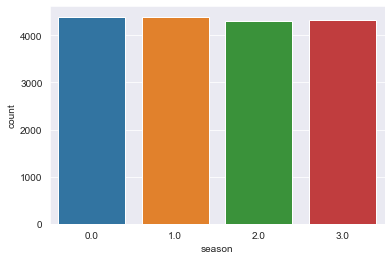

In [84]:
sns.countplot(x = 'season', data = df);

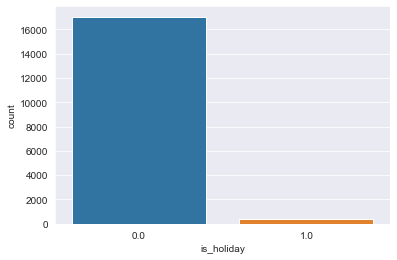

In [85]:
sns.countplot(x = 'is_holiday', data = df);

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

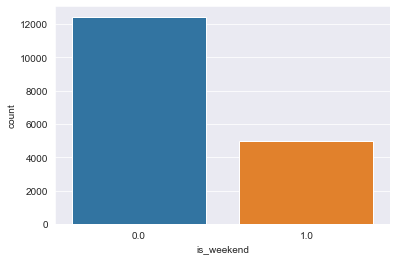

In [28]:
sns.countplot(x = 'is_weekend', data = df)

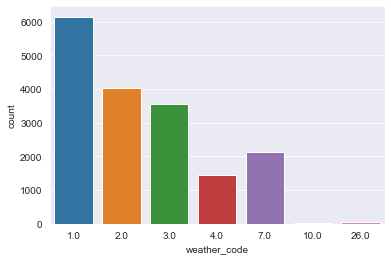

In [86]:
sns.countplot('weather_code', data = df);

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [87]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [89]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  hour          17414 non-null  int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 2.6+ MB


### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [4]:
df.timestamp = pd.to_datetime(df.timestamp)

In [5]:
df['year_month'] = df['timestamp'].dt.strftime('%Y-%m')

In [6]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01


In [7]:
year = df.timestamp.dt.year

In [8]:
df['year'] = year

In [9]:
month = df.timestamp.dt.month

In [10]:
df['month'] = month

In [11]:
day_of_month = df.timestamp.dt.day

In [12]:
df['day_of_month'] = day_of_month

In [13]:
day_of_week = df.timestamp.dt.day_of_week

In [14]:
df['day_of_week'] = day_of_week

In [15]:
hour = df.timestamp.dt.hour

In [16]:
df['hour'] = hour

In [17]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [18]:
df.set_index('timestamp', inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  hour          17414 non-null  int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 2.1+ MB


### 7.Visualize the correlation with a heatmap

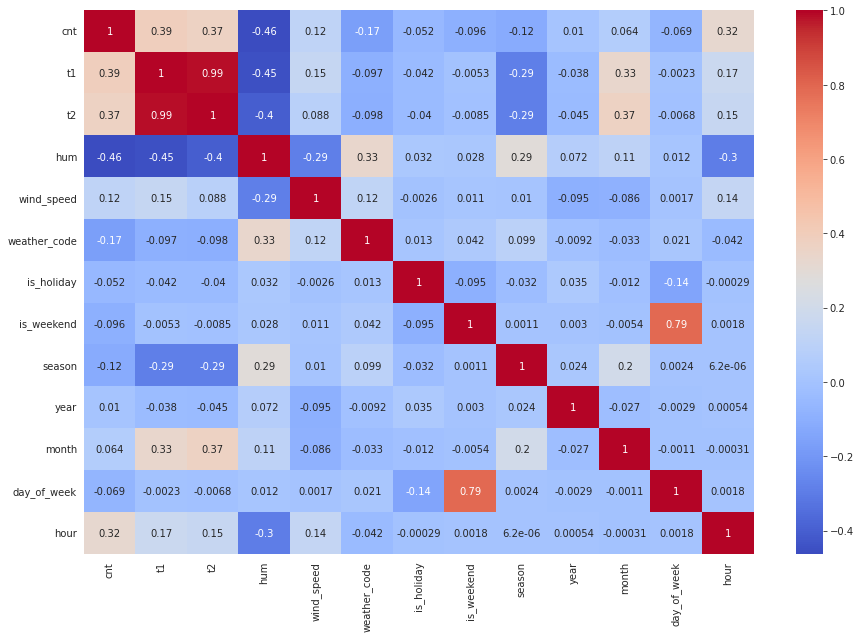

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data= df.corr(), annot = True, cmap = 'coolwarm', ax=ax);

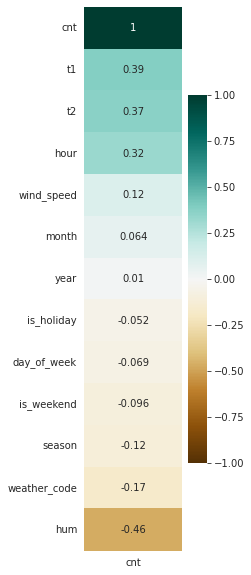

In [ ]:
fig, ax = plt.subplots(figsize = (2.2 ,10))
sns.heatmap(df.corr().loc[:, ['cnt']].sort_values(by=['cnt'],ascending=False), cmap = 'BrBG',annot = True,vmin=-1, vmax=1  ,ax = ax)

### 8. Visualize the correlation of the target variable and the other features with barplot

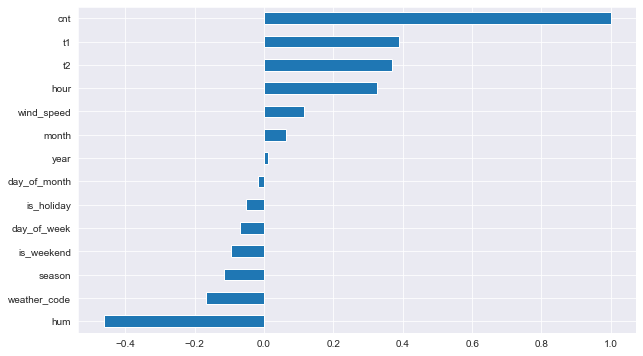

In [ ]:
plt.figure(figsize = (10,6))
df.corr()['cnt'].sort_values().plot.barh();

### 9.Plot bike shares over time use lineplot

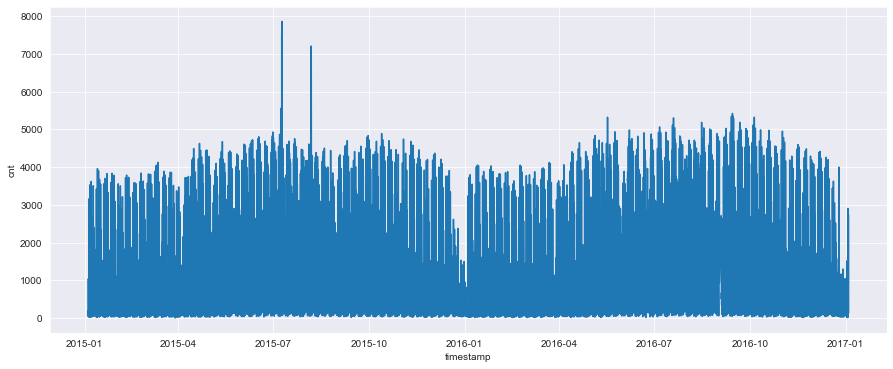

In [ ]:
plt.figure(figsize = (15,6))
sns.lineplot(data = df, x = df.index, y = 'cnt');

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

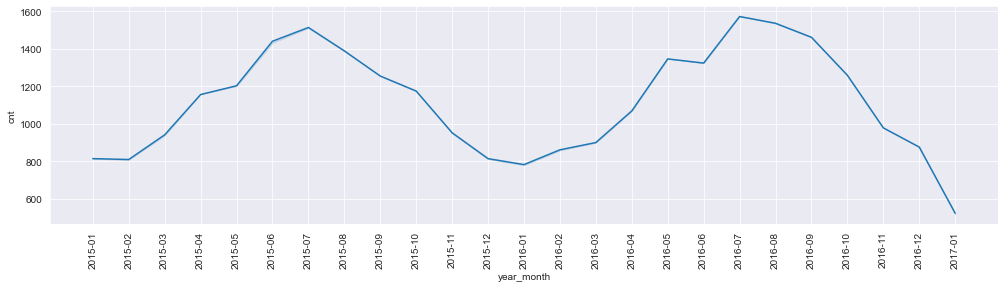

In [ ]:
plt.figure(figsize = (17,4))
sns.lineplot(data = df, x = 'year_month', y = 'cnt', ci = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 90);

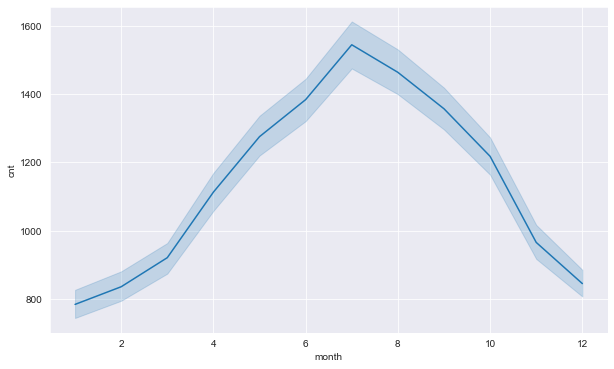

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df, x = 'month', y = 'cnt')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 0);

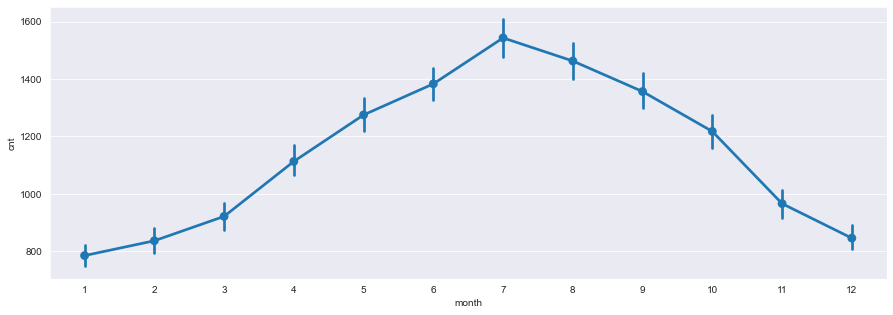

In [ ]:
plt.figure(figsize= (15,5))
sns.pointplot(data=df, x ='month', y ='cnt');

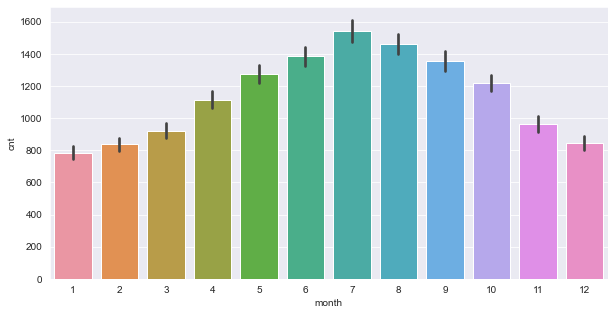

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(data=df, x ='month', y ='cnt');

### 11.Plot bike shares by hours on (holidays, weekend, season)

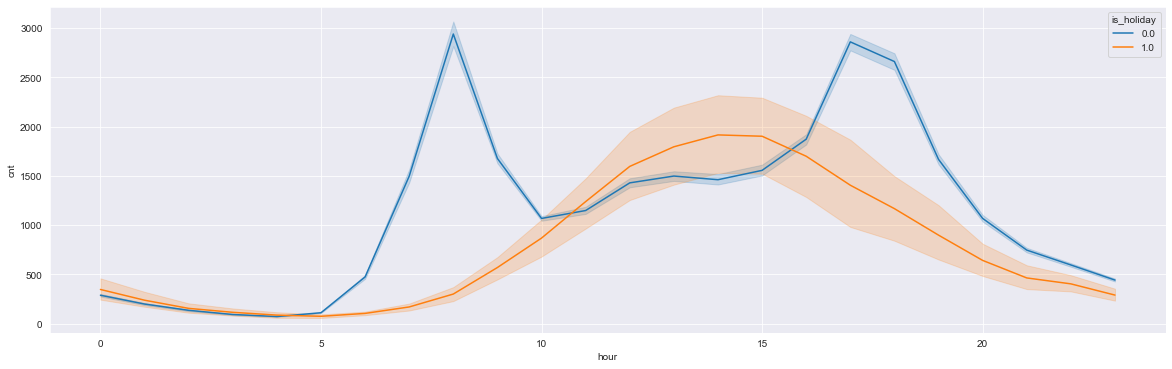

In [ ]:
plt.figure(figsize= (20,6))
sns.lineplot(data=df, x ='hour', y ='cnt', hue='is_holiday');

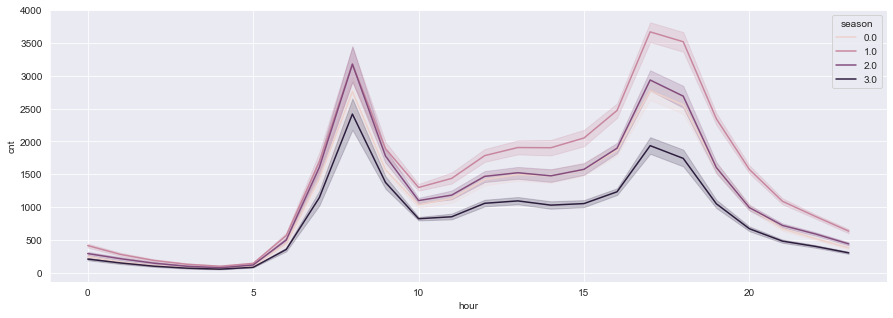

In [ ]:
plt.figure(figsize= (15,5))
sns.lineplot(data=df, x ='hour', y ='cnt', hue='season');

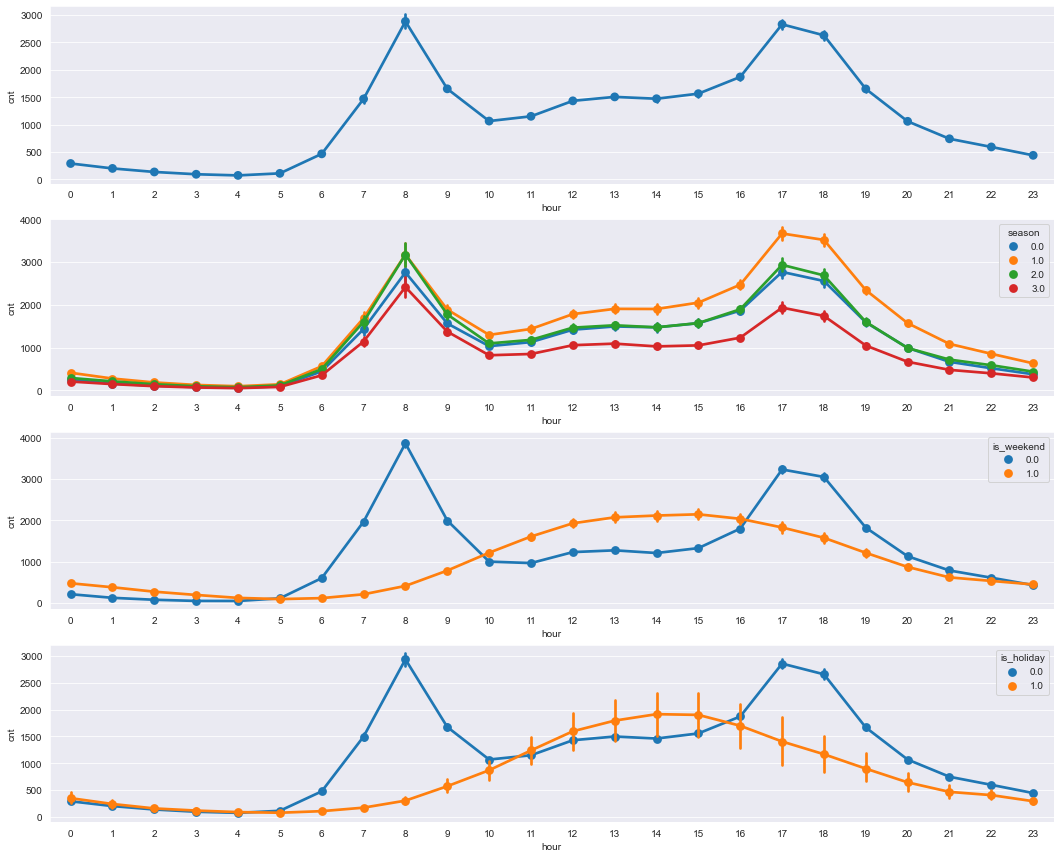

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (18,15))
sns.pointplot(data=df, x ='hour', y ='cnt', ax= ax1)
sns.pointplot(data=df, x ='hour', y ='cnt', hue = 'season', ax= ax2)
sns.pointplot(data=df, x ='hour', y ='cnt',hue = 'is_weekend', ax= ax3)
sns.pointplot(data=df, x ='hour', y ='cnt', hue= 'is_holiday', ax= ax4);

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

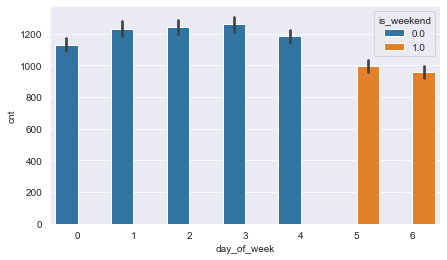

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x ='day_of_week', y ='cnt', hue = 'is_weekend');

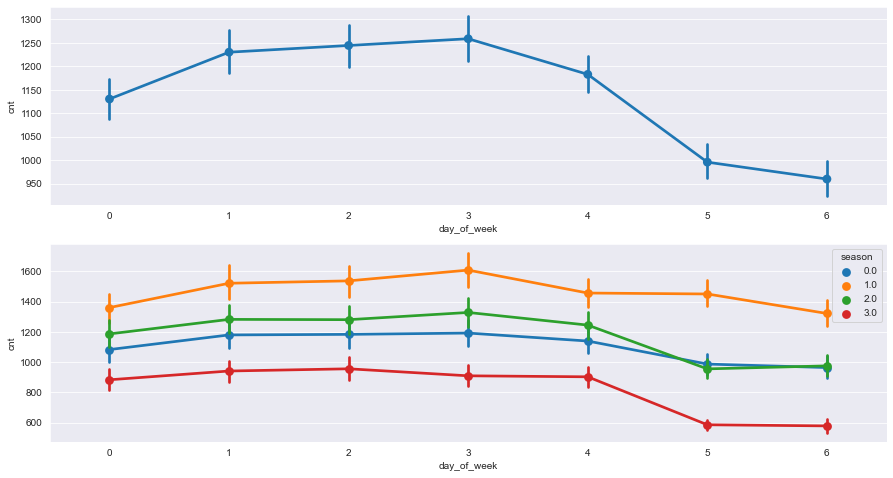

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15,8))
sns.pointplot(data=df, x ='day_of_week', y ='cnt', ax= ax1)
sns.pointplot(data=df, x ='day_of_week', y ='cnt',hue= 'season', ax= ax2);

### 13.Plot bike shares by day of month

In [38]:
(df.groupby('day_of_month')['cnt'].mean().apply((lambda x : round(x)))).T


day_of_month
1     1077
2     1088
3     1128
4     1144
5     1141
6     1211
7     1194
8     1223
9     1261
10    1157
11    1204
12    1167
13    1139
14    1124
15    1176
16    1141
17    1182
18    1179
19    1153
20    1116
21    1126
22    1128
23    1174
24    1054
25    1191
26    1082
27    1131
28    1063
29    1080
30    1156
31     968
Name: cnt, dtype: int64

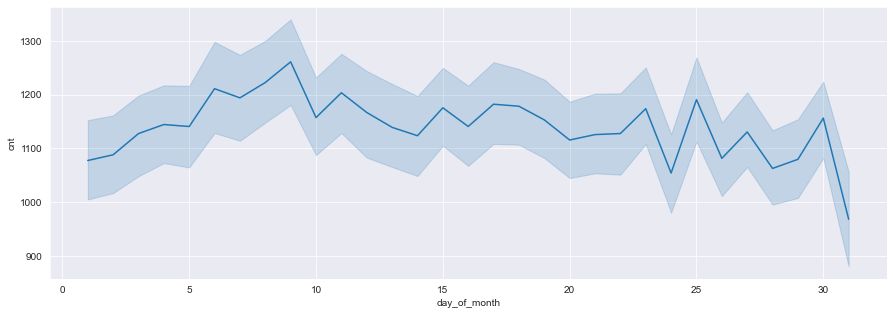

In [23]:
plt.figure(figsize = (15, 5))
sns.lineplot(data=df, x = 'day_of_month', y = 'cnt', ci= 90);

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

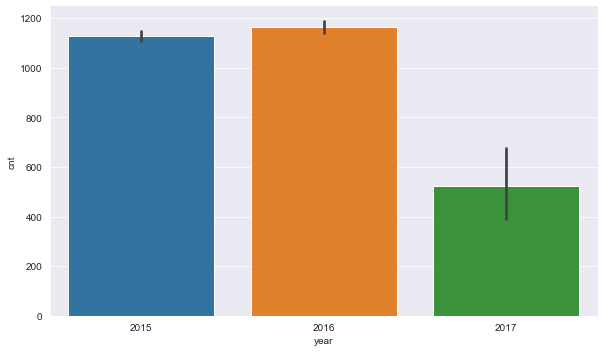

In [51]:
sns.catplot( x= 'year', y = 'cnt', data = df, kind = 'bar', aspect = 1.7);

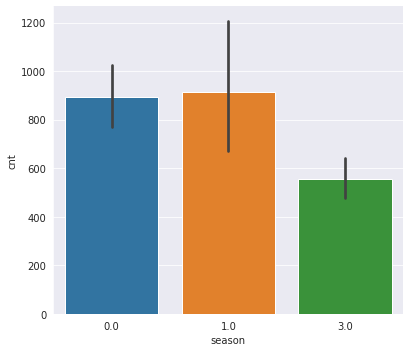

In [ ]:
sns.catplot( x= 'season', y = 'cnt', data = df[df.is_holiday == 1], kind = 'bar', aspect = 1.16, height = 5);

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [ ]:
df['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

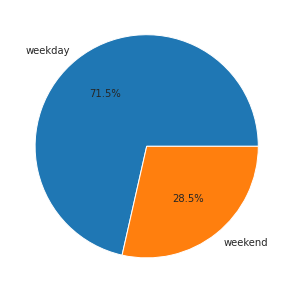

In [ ]:
plt.figure(figsize = (5,8))
y = np.array(df["is_weekend"].value_counts())
labels = ['weekday', 'weekend']
plt.pie(y.round(), labels = labels, labeldistance= 1.1 , autopct="%.1f%%");

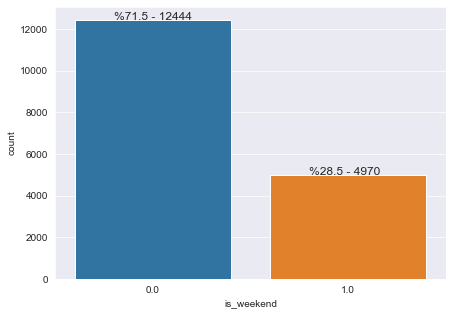

In [25]:
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x='is_weekend',data=df)
for bar in ax.patches:
        ax.annotate("%" + str(round(100*bar.get_height()/len(df), 1)) + ' - ' + str(bar.get_height() ),
                    (bar.get_x()+0.2 , bar.get_height()+10),
                    size=12)

### 16.Plot the distribution of weather code by seasons

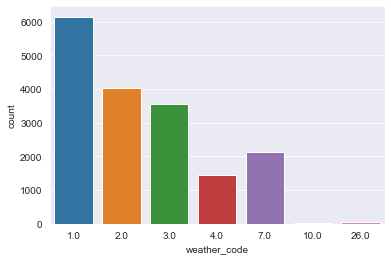

In [26]:
sns.countplot('weather_code', data = df);

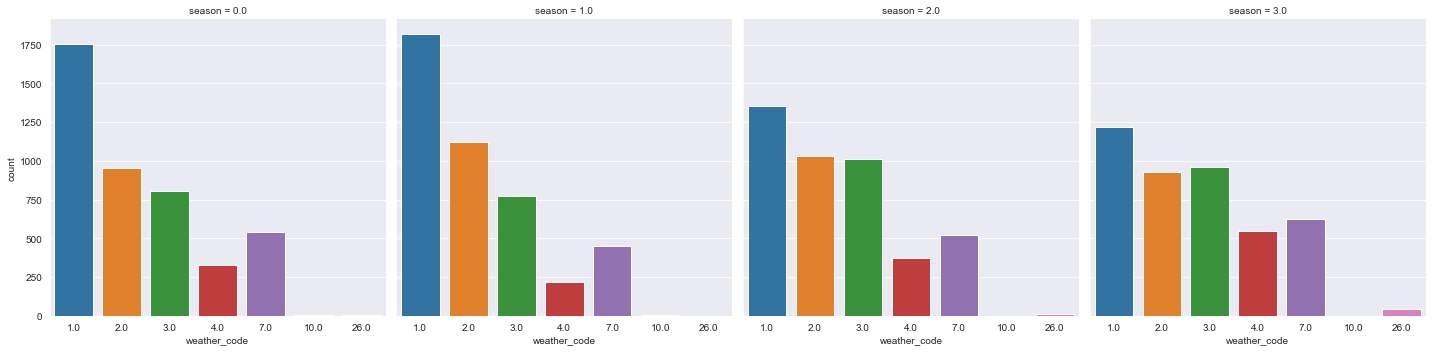

In [27]:
sns.catplot(x="weather_code", col="season", col_wrap= 4, data=df[df.season.notnull()], kind="count");

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___